In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [3]:
train_data = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(train_data.shape)

(7043, 21)


In [4]:
train_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
train_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
# 1) by looking at this data there is lot of Skweness in the Total Charges, Monthly Charges, Tenure, SeniorCitizen
# 2) Among these column there are no zero variance 

In [8]:
# Checking the Missing Values
features_with_na=[features for features in train_data.columns if train_data[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature, np.round(train_data[feature].isnull().mean()*100, 2),  ' % missing values')

In [9]:
# 3) there are no Missing Values

In [10]:
numerical_features = [feature for feature in train_data.columns if train_data[feature].dtypes != 'O']
non_numerical_feature = [feature for feature in train_data.columns if train_data[feature].dtypes == 'O']

In [11]:
numerical_features

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [12]:
non_numerical_feature

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [13]:
# in Numeric Data Try to find the Discrete data and Continuous Data

In [14]:
# to find the Discrete Data in the Numeric data
for feature in numerical_features:
    if feature != "Churn": # Churn is the Target Column
        print(f'{feature} => {len(train_data[feature].unique())}')

SeniorCitizen => 2
tenure => 73
MonthlyCharges => 1585
TotalCharges => 6534


In [15]:
# 4) by Looking at this data SeniorCitizen is Discrete Numerical Data

In [16]:
discrete_numerical_feature=[feature for feature in numerical_features if len(train_data[feature].unique())<25 and feature]
print("Discrete Numerical Variable Count : {}".format(len(discrete_numerical_feature)))

Discrete Numerical Variable Count : 1


<AxesSubplot:ylabel='Churn'>

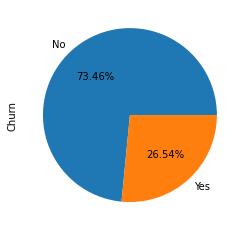

In [17]:
train_data['Churn'].value_counts().plot.pie(autopct = '%1.2f%%')

In [18]:
# 5) By Looking at the Pie Chart Data is Not Balanced data

In [20]:
continuous_numerical_feature=[feature for feature in numerical_features if len(train_data[feature].unique())>25 and feature != "PassengerId"]
print("Continuous Numerical Variable Count : {}".format(len(continuous_numerical_feature)))

Continuous Numerical Variable Count : 3


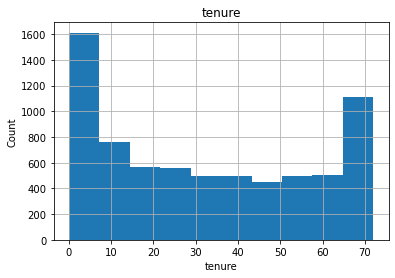

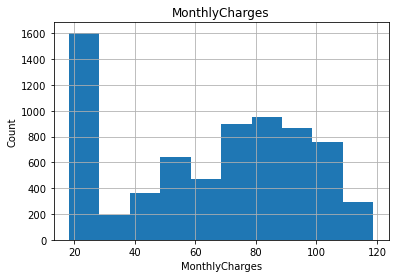

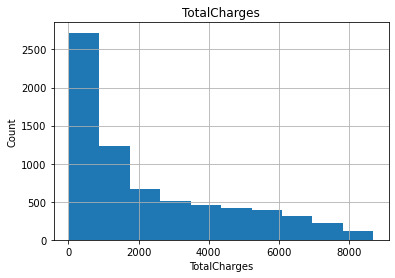

In [22]:
for feature in continuous_numerical_feature:
    data=train_data.copy()
    data[feature].hist(bins=10)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [28]:
# 6) Total Charges is Right Skweed

In [26]:
train_data["Churn"] = train_data['Churn'].map({'Yes':1, 'No':0})

--------------------------------gender--------------------------------------
gender
Female    3488
Male      3555
Name: gender, dtype: int64


Churn      0    1
gender           
Female  2549  939
Male    2625  930


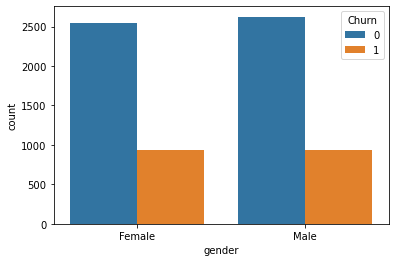

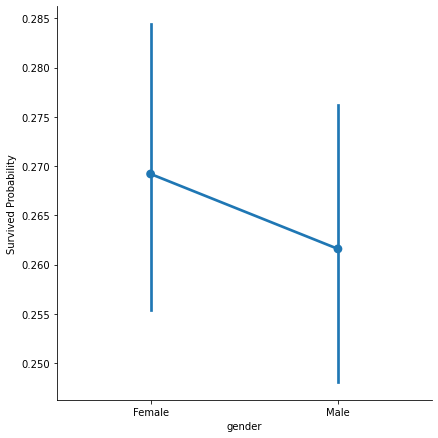

--------------------------------------------------------------------------------


--------------------------------Partner--------------------------------------
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64


Churn       0     1
Partner            
No       2441  1200
Yes      2733   669


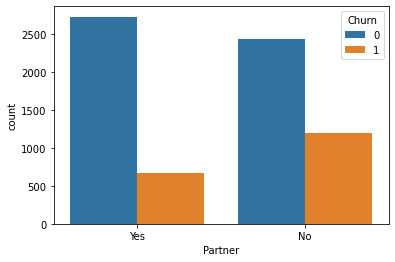

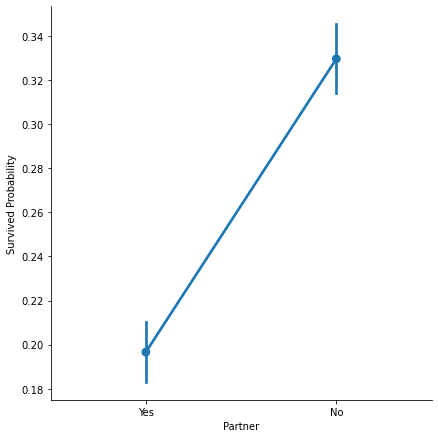

--------------------------------------------------------------------------------


--------------------------------Dependents--------------------------------------
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64


Churn          0     1
Dependents            
No          3390  1543
Yes         1784   326


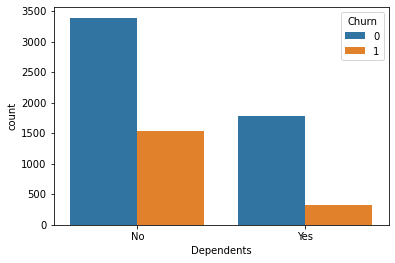

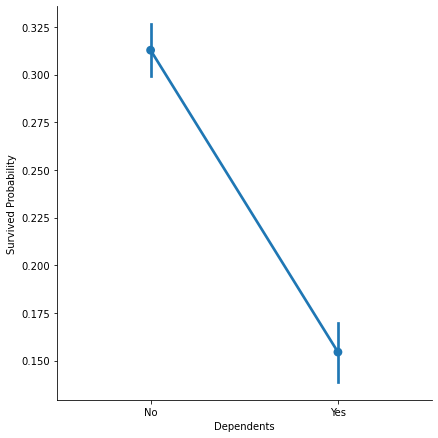

--------------------------------------------------------------------------------


--------------------------------PhoneService--------------------------------------
PhoneService
No      682
Yes    6361
Name: PhoneService, dtype: int64


Churn            0     1
PhoneService            
No             512   170
Yes           4662  1699


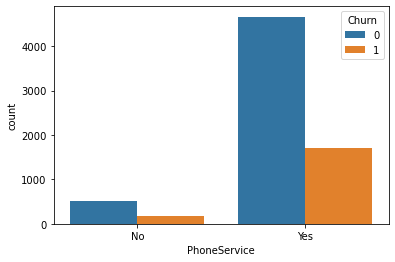

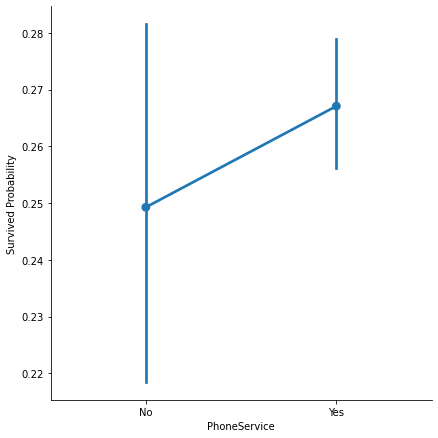

--------------------------------------------------------------------------------


--------------------------------MultipleLines--------------------------------------
MultipleLines
No                  3390
No phone service     682
Yes                 2971
Name: MultipleLines, dtype: int64


Churn                0    1
MultipleLines              
No                2541  849
No phone service   512  170
Yes               2121  850


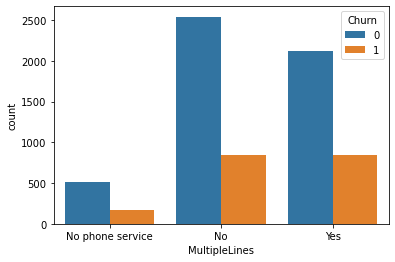

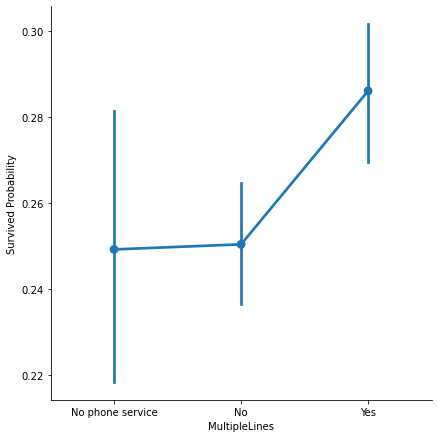

--------------------------------------------------------------------------------


--------------------------------InternetService--------------------------------------
InternetService
DSL            2421
Fiber optic    3096
No             1526
Name: InternetService, dtype: int64


Churn               0     1
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113


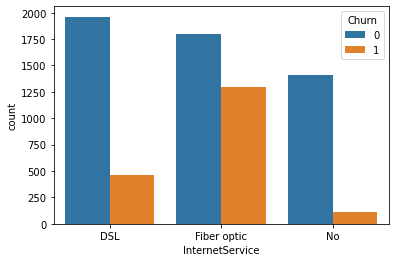

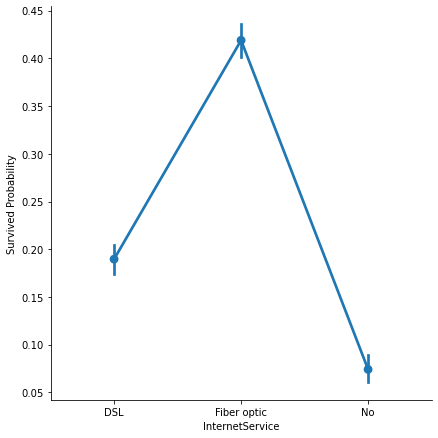

--------------------------------------------------------------------------------


--------------------------------OnlineSecurity--------------------------------------
OnlineSecurity
No                     3498
No internet service    1526
Yes                    2019
Name: OnlineSecurity, dtype: int64


Churn                   0     1
OnlineSecurity                 
No                   2037  1461
No internet service  1413   113
Yes                  1724   295


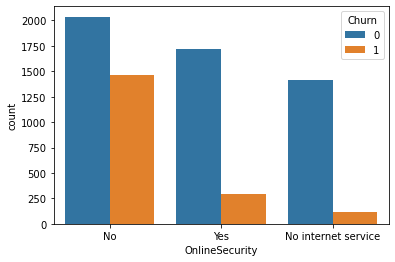

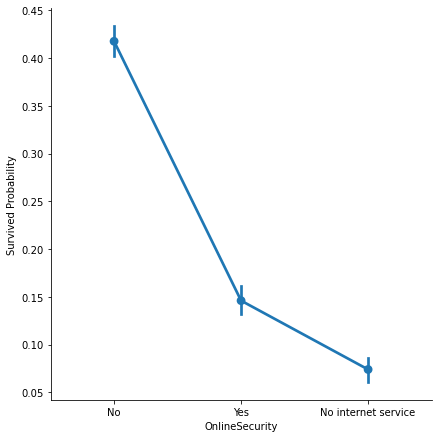

--------------------------------------------------------------------------------


--------------------------------OnlineBackup--------------------------------------
OnlineBackup
No                     3088
No internet service    1526
Yes                    2429
Name: OnlineBackup, dtype: int64


Churn                   0     1
OnlineBackup                   
No                   1855  1233
No internet service  1413   113
Yes                  1906   523


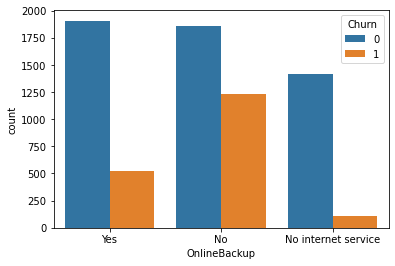

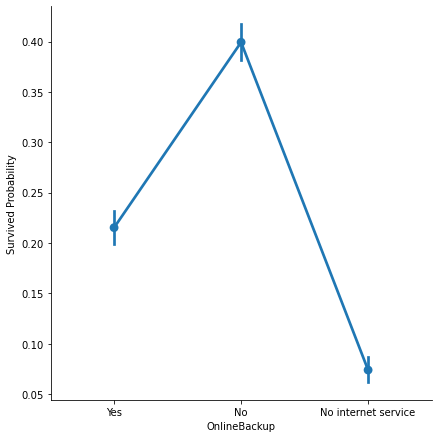

--------------------------------------------------------------------------------


--------------------------------DeviceProtection--------------------------------------
DeviceProtection
No                     3095
No internet service    1526
Yes                    2422
Name: DeviceProtection, dtype: int64


Churn                   0     1
DeviceProtection               
No                   1884  1211
No internet service  1413   113
Yes                  1877   545


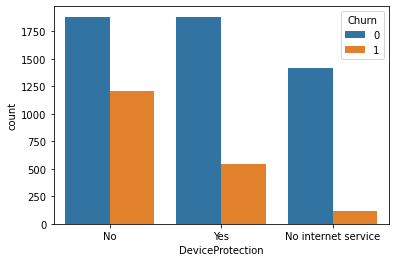

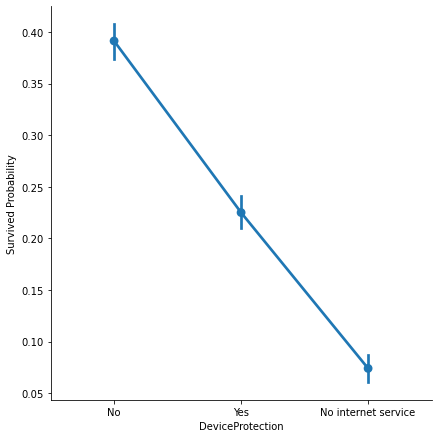

--------------------------------------------------------------------------------


--------------------------------TechSupport--------------------------------------
TechSupport
No                     3473
No internet service    1526
Yes                    2044
Name: TechSupport, dtype: int64


Churn                   0     1
TechSupport                    
No                   2027  1446
No internet service  1413   113
Yes                  1734   310


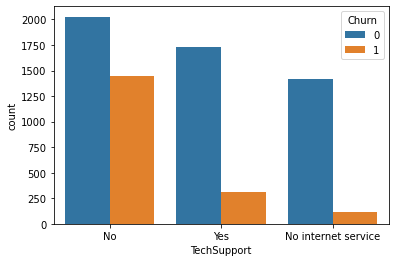

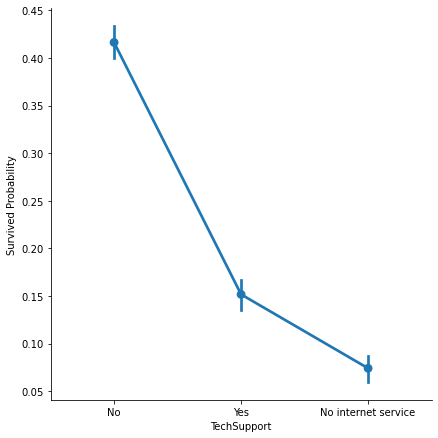

--------------------------------------------------------------------------------


--------------------------------StreamingTV--------------------------------------
StreamingTV
No                     2810
No internet service    1526
Yes                    2707
Name: StreamingTV, dtype: int64


Churn                   0    1
StreamingTV                   
No                   1868  942
No internet service  1413  113
Yes                  1893  814


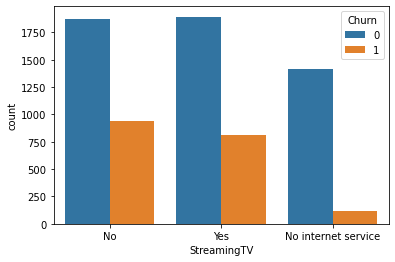

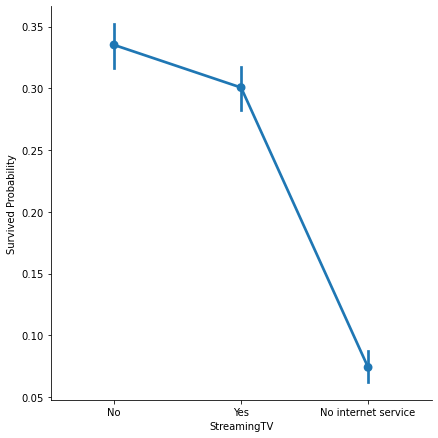

--------------------------------------------------------------------------------


--------------------------------StreamingMovies--------------------------------------
StreamingMovies
No                     2785
No internet service    1526
Yes                    2732
Name: StreamingMovies, dtype: int64


Churn                   0    1
StreamingMovies               
No                   1847  938
No internet service  1413  113
Yes                  1914  818


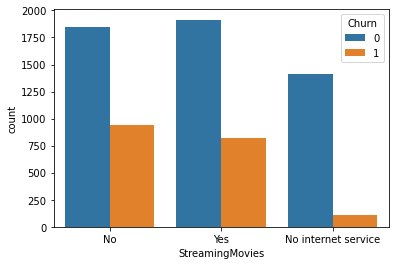

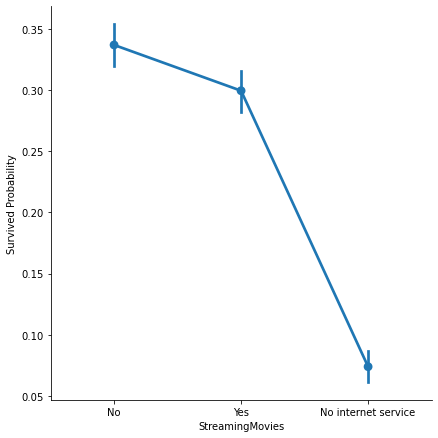

--------------------------------------------------------------------------------


--------------------------------Contract--------------------------------------
Contract
Month-to-month    3875
One year          1473
Two year          1695
Name: Contract, dtype: int64


Churn              0     1
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48


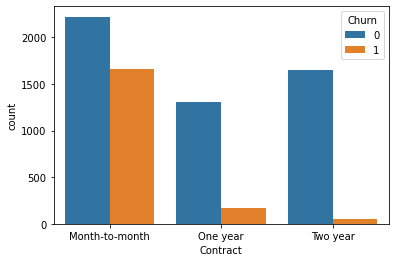

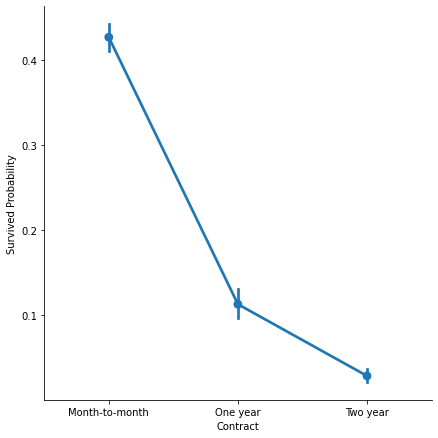

--------------------------------------------------------------------------------


--------------------------------PaperlessBilling--------------------------------------
PaperlessBilling
No     2872
Yes    4171
Name: PaperlessBilling, dtype: int64


Churn                0     1
PaperlessBilling            
No                2403   469
Yes               2771  1400


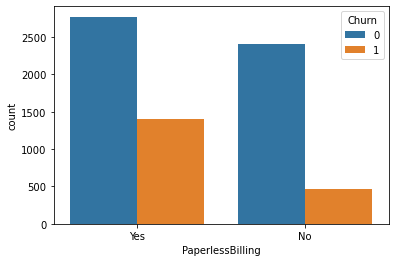

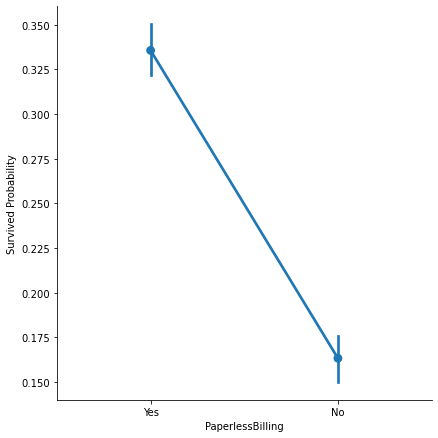

--------------------------------------------------------------------------------


--------------------------------PaymentMethod--------------------------------------
PaymentMethod
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Electronic check             2365
Mailed check                 1612
Name: PaymentMethod, dtype: int64


Churn                         0     1
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308


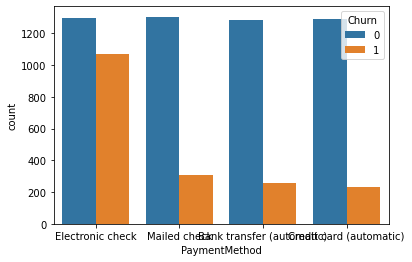

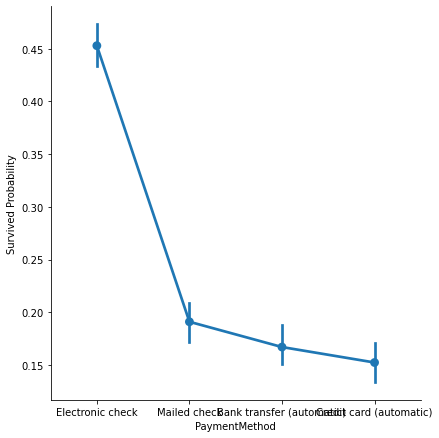

--------------------------------------------------------------------------------


--------------------------------SeniorCitizen--------------------------------------
SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64


Churn             0     1
SeniorCitizen            
0              4508  1393
1               666   476


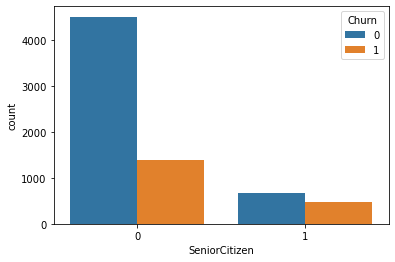

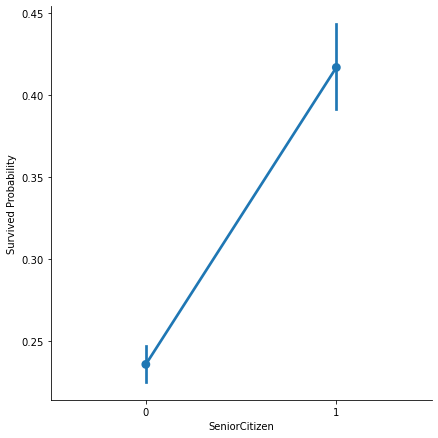

--------------------------------------------------------------------------------




In [27]:
for feature in non_numerical_feature+discrete_numerical_feature:
    if feature != "customerID" and feature != "Churn":
        print(f"--------------------------------{feature}--------------------------------------")
        print(train_data.groupby(feature)[feature].count())
        print("\n")
        print(pd.crosstab(train_data[feature], train_data["Churn"]))
        sns.countplot(feature, data = train_data, hue = 'Churn')
        plt.show()
        g = sns.factorplot(x=feature, y="Churn", data=train_data, size=6)
        g.set_ylabels("Survived Probability")
        plt.show()
        print(f"--------------------------------------------------------------------------------\n\n")

In [ ]:
'''
7) Gender (Male, Female)
        -> Male and Female are close to equal Proposion
        -> Among Male and female, female is more likely to churn than male
        -> but there is less Difference churn
8) Partner (Yes, No)
        -> Yes and No are close to equal Proposion
        -> No is More Likely to Churn than Yes
        -> there is a huge Difference in Churn
9) Dependents (Yes, No)
        -> No > Yes (there are more No of No's then yes)
        -> No is More Likely to Churn than Yes
        -> there is a huge Differnce in Churn No > Yes
10) PhoneService (Yes, No)
        -> Yes > No (There are More No of Yes than No )
        -> Yes is More Likely to Churn than No
        -> there is less Difference in the Churn
11) MultipleLines (No, No phone service, Yes) 
        -> No > Yes > No phone service (these are the propositions of the data)
        -> Yes > No phone service > No (these are the sequence of Churn rate)
        -> there is more difference in Yes >  No phone service , but there is less difference in No phone service > No
12) InternetService (DSL, Fiber optics, No)    
        -> Fiber optic > DSL > No (these are the proposition of Data)
        -> Fiber optic > DSL > No (these are the sequence of Churn rate)
        -> there is signifient difference among them
13) OnlineSecurity (No, No internet service, Yes)
        -> No > Yes > No internet service (these are the propositions of the data)
        -> No > Yes > No internet service (these are the sequence of Churn rate)
        -> there is a signifient difference in No > Yes and there is less difference Yes > No internet service
14) OnlineBackup (No, No internet service, Yes)
        -> No > Yes > No internet service (these are the propositions of the data)
        -> No > Yes > No internet service (these are the sequence of Churn rate)
        -> there is signifient difference among them
15) DeviceProtection (No, No internet service, Yes )
        -> No > Yes > No internet service (these are the propositions of the data)
        -> No > Yes > No internet service (these are the sequence of Churn rate)
        -> there is signifient difference among them
16) TechSupport (No, No internet service, Yes)
        -> No > Yes > No internet service (these are the propositions of the data)
        -> No > Yes > No internet service (these are the sequence of Churn rate)
        -> there is signifient difference among them
17) StreamingTV (No, No internet service, Yes)
        -> No > Yes > No internet service (these are the propositions of the data)
        -> No > Yes > No internet service (these are the sequence of Churn rate)
        -> No > Yes there is less difference , Yes > No internet service there is big difference
18) Contract (Month-to-month, One year, Two year)
        -> Month-to-month > Two year > One year (these are the propositions of the data)
        -> Month-to-month > One year > Two year (these are the sequence of Churn rate)
        ->  Month-to-month > One year there is a big difference ,  One year > Two year less difference
19) PaperlessBilling (No, Yes) 
        -> Yes > No (these are the propositions of the data)
        -> Yes >> No  (these are the sequence of Churn rate)
        -> Yes > No there is huge difference
20) PaymentMethod (Bank transfe, Credit card, Electronic check, Mailed check )    
        -> Electronic check > Bank transfer > Credit card > Mailed check  (these are the propositions of the data)
        -> Electronic check >> Mailed check > Bank transfer > Credit card (these are the sequence of Churn rate)
21) SeniorCitizen (0-No, 1-Yes)
        -> 0 >> 1 (these are the propositions of the data)
        -> 1 >> 0 (these are the sequence of Churn rate)     
'''